<a href="https://colab.research.google.com/github/JackSandford/ECK/blob/main/Projects/Self_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project was used to showcase my learning over the past 8 weeks. I use python pandas as well as matplotlib.

Importing data

In [1]:
import os
import pandas as pd
import json 
from google.colab import drive
import matplotlib.pyplot as plt

def mount_drive():
  drive.mount('/content/drive', force_remount=True)
  project_dir = "/content/drive/MyDrive/OneHourOfData"
  return project_dir

def unmount_drive():
  drive.flush_and_unmount()
  print('Drive Unmounted')

def get_file_names(project_dir):
  path = os.path.join(os.getcwd(),project_dir)
  filenames = [os.path.join(path,i) for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
  return filenames


project_dir = mount_drive()

filenames = get_file_names(project_dir)
filenames = filenames[:6]

Mounted at /content/drive


In [2]:
# The data frames I will use
regs = pd.read_csv('https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/bus_regs.csv')
ohod = pd.read_json('/content/drive/MyDrive/OneHourOfData/busdata_22-09-07_08-07-48.json')

A function which sorts the data for buses of the euro standard entered.

In [3]:
def euro_class_only(df, euro):
  euroxbuses = []
  euroxregslist = []
  # Sorts for EURO x buses in the fleet
  euroxregs = regs[regs['Emission Class'] == euro]
  # Adds the registrations to a list which can be searched through
  for reg in euroxregs['Last tracked']:
    euroxregslist.append(reg)
  # Filteres the buses in the live data frame for only EURO x regs in the list
  euroxbuses = mvj[mvj['VehicleRef'].isin(euroxregslist)]
  return euroxbuses

mvj = pd.json_normalize(ohod.MonitoredVehicleJourney)
ext = pd.json_normalize(ohod.Extensions)

euro3_buses = euro_class_only(ohod, 'EURO III')
# Prints number of euro 3 buses in live data
print(len(euro3_buses))

#display(mvj[mvj['LineRef'] == '132'])
#mvj['LineRef'].value_counts()

28


Creating a pie chart showing what percentage of the fleet each type of bus makes up. Each type of bus is filtered using the function made previously.

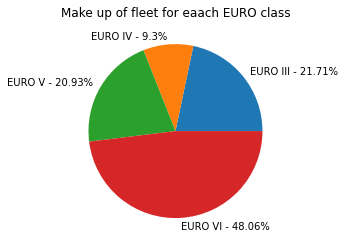

In [4]:
def types_of_buses():
  euro4_buses = euro_class_only(ohod, 'EURO IV')
  euro5_buses = euro_class_only(ohod, 'EURO V')
  euro6_buses = euro_class_only(ohod, 'EURO VI')
  numbersbuses = (len(euro3_buses), len(euro4_buses), len(euro5_buses), len(euro6_buses))
  # Total number of buses in live data and the percentage of each the EURO classes make up
  total_length = len(euro3_buses) + len(euro4_buses) + len(euro5_buses) + len(euro6_buses)
  percentage3 = round((len(euro3_buses) / total_length) * 100, 2)
  percentage4 = round((len(euro4_buses) / total_length) * 100, 2)
  percentage5 = round((len(euro5_buses) / total_length) * 100, 2)
  percentage6 = round((len(euro6_buses) / total_length) * 100, 2)
  keys = (('EURO III - {}%'.format(percentage3)), ('EURO IV - {}%'.format(percentage4)), ('EURO V - {}%'.format(percentage5)), ('EURO VI - {}%'.format(percentage6)))
  plt.pie(numbersbuses, labels = keys)
  plt.title('Make up of fleet for eaach EURO class')
  return plt.show()

types_of_buses()

Showing how many EURO III buses on each route there are taken from live data.

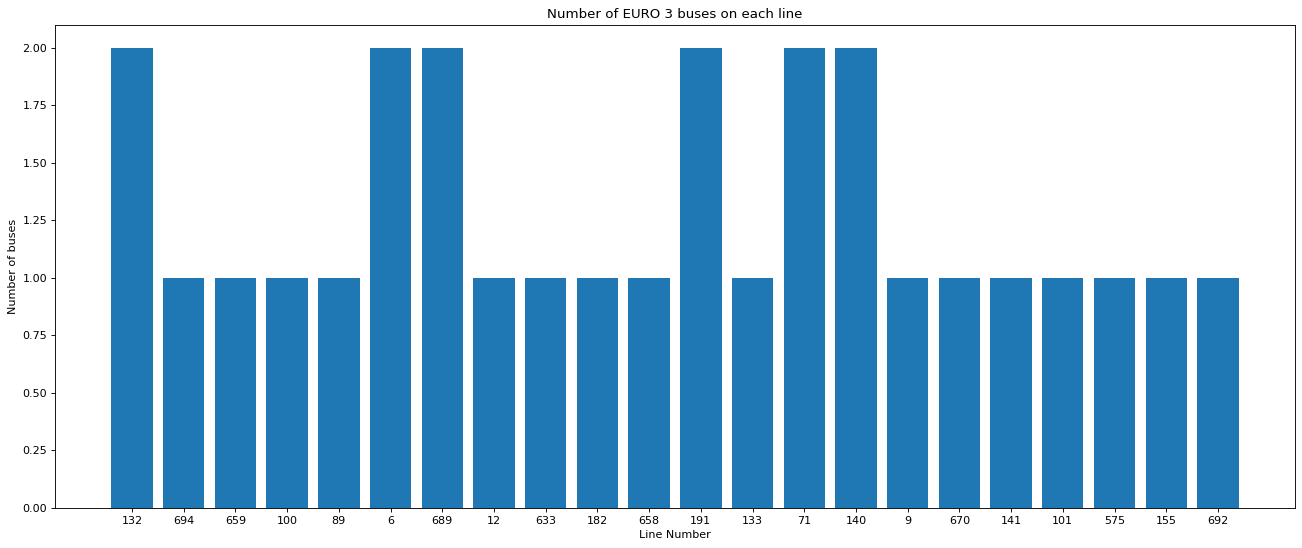

In [5]:
from matplotlib.pyplot import figure
def hist(df, column, returned):
  # Created a dictionary of how many EURO x buses are on each line
  histdict = {}
  for number in df[column]:
    if histdict.get(number,0) == 0:
      histdict[number] = 1
    elif histdict.get(number,0) > 0:
      histdict[number] = histdict.get(number,0) + 1
  # Turns the dictionary into a data frame
  hist = pd.DataFrame(histdict.items(), columns=['Line', 'Number of euro x buses'])
  if returned == 'table':
    return hist
  elif returned == 'dictionary':
    return histdict

hist_table = hist(euro3_buses, 'LineRef', 'table')

def show_hist(df,column):
  # Plots the count data as a bar graph. A histogram chart was available but it caused errors.
  figure(figsize=(20, 8), dpi=80)
  plt.bar(df['Line'], df[column])
  plt.xticks(rotation = 0)
  plt.xlabel('Line Number')
  plt.ylabel('Number of buses')
  plt.title('Number of EURO 3 buses on each line')
  
  plt.show()

show_hist(hist_table, 'Number of euro x buses')

Creating a table for a bar chart of which buses use which lines

In [6]:
def createbartable():
  # Setting up the merged data frame
  stack = pd.DataFrame()
  stack['Line'] = mvj['LineRef']
  stack = stack.drop_duplicates()
  # Creates data frames of the counts for each EURO class
  histdict3 = hist(euro3_buses, 'LineRef', 'dictionary')
  histdict4 = hist(euro4_buses, 'LineRef', 'dictionary')
  histdict5 = hist(euro5_buses, 'LineRef', 'dictionary')
  histdict6 = hist(euro6_buses, 'LineRef', 'dictionary')
  hist3 = pd.DataFrame(histdict3.items(), columns=['Line', 'EURO III'])
  hist4 = pd.DataFrame(histdict4.items(), columns=['Line', 'EURO IV'])
  hist5 = pd.DataFrame(histdict5.items(), columns=['Line', 'EURO V'])
  hist6 = pd.DataFrame(histdict6.items(), columns=['Line', 'EURO VI'])
  # Meerges the data frames into one
  stack3 = pd.merge(hist3, stack, how = 'outer')
  stack4 = pd.merge(hist4, stack3, how = 'outer')
  stack5 = pd.merge(hist5, stack4, how = 'outer')
  stack6 = pd.merge(hist6, stack5, how = 'outer')
  return stack6

# sorting required data first into its euro forms
# then creating a histogram in the form of a dictionary for each

euro4_buses = euro_class_only(ohod, 'EURO IV')
euro5_buses = euro_class_only(ohod, 'EURO V')
euro6_buses = euro_class_only(ohod, 'EURO VI')

bartable = createbartable()
display(bartable)

,Line,EURO VI,EURO V,EURO IV,EURO III
0,7,2.0,NaN,1.0,NaN
1,1,1.0,1.0,NaN,NaN
2,190,5.0,NaN,NaN,NaN
3,101,9.0,1.0,NaN,1.0
4,10,1.0,NaN,NaN,NaN
5,334,4.0,1.0,NaN,NaN
6,177,3.0,NaN,1.0,NaN
7,5,1.0,2.0,NaN,NaN
8,82,2.0,3.0,NaN,NaN
9,176,5.0,2.0,1.0,NaN


Showing the table in a bar graph

,EURO VI,EURO V,EURO IV,EURO III
0,4.0,NaN,2.0,NaN
1,2.0,2.0,NaN,NaN
2,10.0,NaN,NaN,NaN
3,18.0,2.0,NaN,2.0
4,2.0,NaN,NaN,NaN
5,8.0,2.0,NaN,NaN
6,6.0,NaN,2.0,NaN
7,2.0,4.0,NaN,NaN
8,4.0,6.0,NaN,NaN
9,10.0,4.0,2.0,NaN


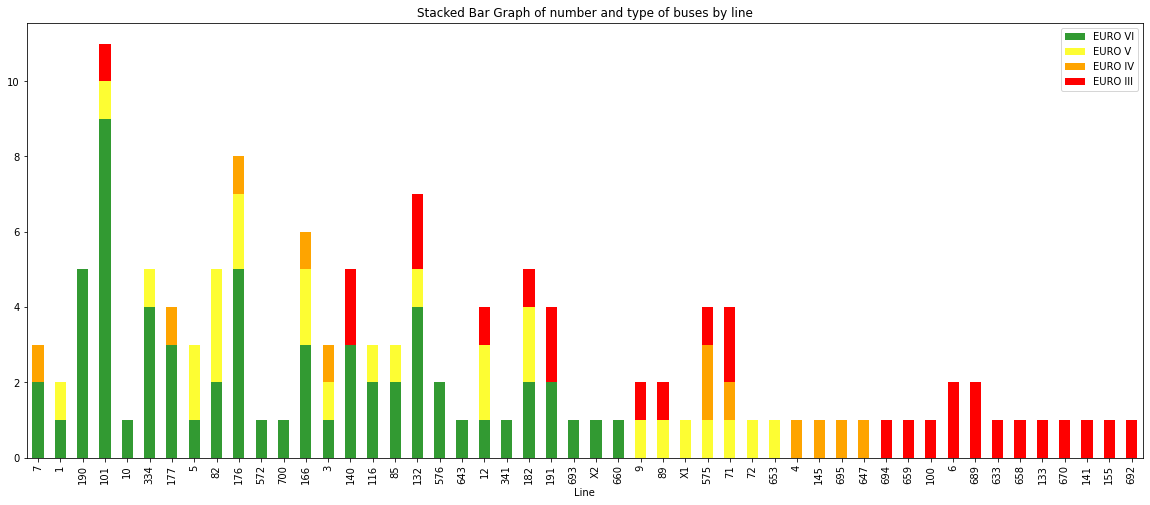

In [7]:
from matplotlib.colors import ListedColormap
import numpy as np
def showbar():  
  # Defines the colours for each EURO class
  red = np.array([255/256, 0/256, 0/256, 1])
  orange = np.array([255/256, 165/256, 0/256, 1])
  yellow = np.array([254/256, 254/256, 51/256, 1])
  green = np.array([50/256, 155/256, 50/256, 1])
  newcolors = [green, yellow , orange, red]
  newcmp = ListedColormap(newcolors)
  # Plots the bar chart using pandas
  bartable.plot(x='Line', kind='bar', stacked=True,
        title='Stacked Bar Graph of number and type of buses by line', figsize=(20,8), colormap = newcmp)
 
showbar()
eurolist = ['EURO VI', 'EURO V', 'EURO IV', 'EURO III']
def bartable_of_percentages():
  bartable_percentages = pd.DataFrame()
  for euro in eurolist:
    bartable_percentages[euro] = bartable[euro].astype(float) * 2
  return bartable_percentages

bartable_percentages = bartable_of_percentages()
display(bartable_percentages)

Polutants for each line

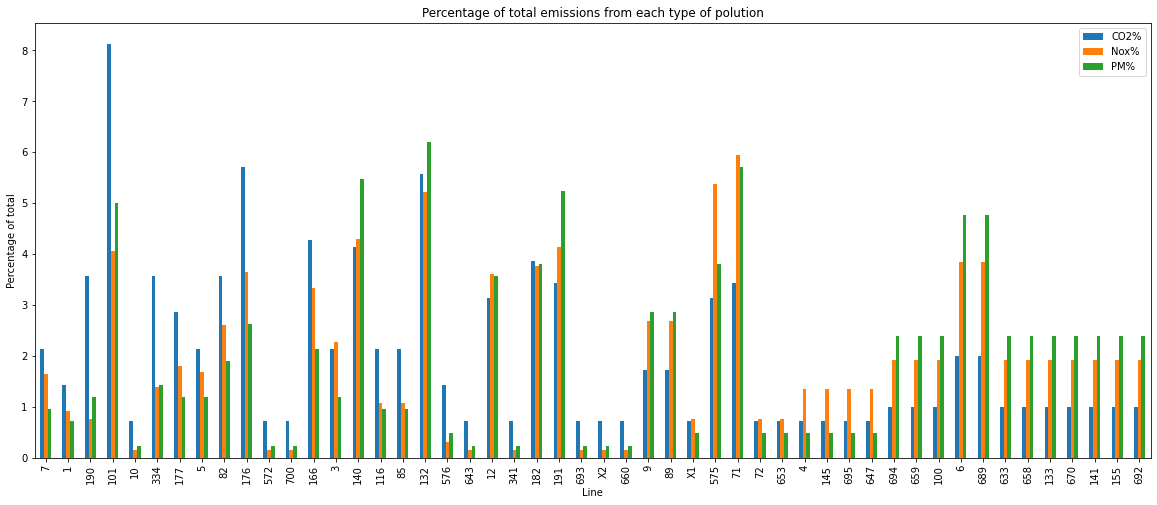

In [54]:
# The grams of each pollutant emitted per KWhr
emissions_data = [
    {"Standard":"EURO III", "CO2":2.1, "Nox":5, "PM":0.1 },
    {"Standard":"EURO IV","CO2":1.5,"Nox":3.5,"PM":0.02 },
    {"Standard":"EURO V","CO2":1.5,"Nox":2,"PM":0.02},
    {"Standard":"EURO VI","CO2":1.5,"Nox":0.4,"PM":0.01}
]

per5min = 5.08 * 13.2 * 0.0833333333

def line_emissions_table():
  # An old diesel bus does about 5 miles to the galon or 2.126 per litre
  # One litre of diesel fuel has 10.8 KWh of energy
  # Total energy per kilometer is 5.08 KWh/km
  # The average bus does about 13.2 km/h including stops and the time is taken every 5 minutes
  line_emissions = bartable.fillna(0)
  # Calculates the total emissions of each polutant in a 5 minute frame
  line_emissions['CO2'] = per5min * ((line_emissions['EURO VI'].astype(float) * emissions_data[3]['CO2']) + (line_emissions['EURO V'].astype(float) * emissions_data[2]['CO2']) + (line_emissions['EURO IV'].astype(float) * emissions_data[1]['CO2']) + (line_emissions['EURO III'].astype(float) * emissions_data[0]['CO2']))
  line_emissions['Nox'] = per5min * ((line_emissions['EURO VI'].astype(float) * emissions_data[3]['Nox']) + (line_emissions['EURO V'].astype(float) * emissions_data[2]['Nox']) + (line_emissions['EURO IV'].astype(float) * emissions_data[1]['Nox']) + (line_emissions['EURO III'].astype(float) * emissions_data[0]['Nox']))
  line_emissions['PM'] = per5min * ((line_emissions['EURO VI'].astype(float) * emissions_data[3]['PM']) + (line_emissions['EURO V'].astype(float) * emissions_data[2]['PM']) + (line_emissions['EURO IV'].astype(float) * emissions_data[1]['PM']) + (line_emissions['EURO III'].astype(float) * emissions_data[0]['PM']))
  CO2sum = line_emissions['CO2'].sum()
  Noxsum = line_emissions['Nox'].sum()
  PMsum = line_emissions['PM'].sum()
  # Finds the percentage each line makes out of the total emissions for all lines in 5 mintes
  line_emissions['CO2%'] = (line_emissions['CO2'] / CO2sum) * 100
  line_emissions['Nox%'] = (line_emissions['Nox'] / Noxsum) * 100
  line_emissions['PM%'] = (line_emissions['PM'] / PMsum) * 100
  line_emissions_plot = pd.DataFrame()
  line_emissions_plot['Line'] = line_emissions['Line']
  line_emissions_plot['CO2%'] = line_emissions['CO2%']
  line_emissions_plot['Nox%'] = line_emissions['Nox%']
  line_emissions_plot['PM%'] = line_emissions['PM%']
  ax = line_emissions_plot.plot(x='Line',
        kind='bar',
        stacked=False,
        title='Percentage of total emissions from each type of polution',
        figsize = (20,8))
  ax.set_ylabel('Percentage of total')
  return line_emissions_plot

line_emissions = line_emissions_table()

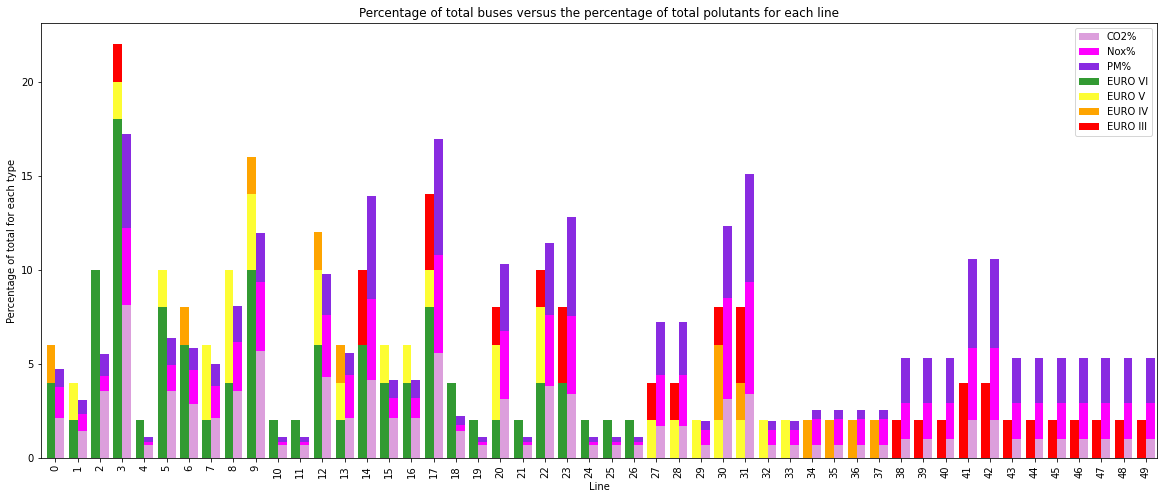

In [69]:
def busespolutantsshow():
  # Calculates colourmap arrays on which to colour the bar charts
  red = np.array([255/256, 0/256, 0/256, 1])
  orange = np.array([255/256, 165/256, 0/256, 1])
  yellow = np.array([254/256, 254/256, 51/256, 1])
  green = np.array([50/256, 155/256, 50/256, 1])
  newcolors = [green, yellow , orange, red]
  newcmp = ListedColormap(newcolors)

  move = np.array([221/256 ,160/256 ,221/256, 1])
  pink = np.array([255/256 ,0/256 ,255/256, 1])
  blue = np.array([138/256 ,43/256 ,226/256, 1])
  smallcolors = [move, pink, blue]
  smallcmp= ListedColormap(smallcolors)

  # Overlaps the bar charts over eachother with ax=ax
  fig, ax = plt.subplots()
  line_emissions.plot(kind="bar", stacked=True, width=0.4,
                    ax=ax, position=0, figsize = (20,8),colormap = smallcmp, 
                    title = 'Percentage of total buses versus the percentage of total polutants for each line')
  bartable_percentages.plot(kind="bar", stacked=True, width=0.4, 
                     ax=ax, position=1, figsize = (20,8), colormap = newcmp)
  
  # Adds labels and moves the charts to the right of one another
  ax.set_xlabel('Line')
  ax.set_ylabel('Percentage of total for each type')
  ax.set_xlim(right=len(line_emissions)-0.5)

busespolutantsshow()

# Unable to get the lines to show the line number

In [64]:
def create_alldf(): 
  alldf = pd.DataFrame()
  alldf['Ref'] = mvj['VehicleRef']
  alldf['Line'] = mvj['LineRef']
  euro3regslist = []
  euro4regslist = []
  euro5regslist = []
  euro6regslist = []
  euro3regs = regs[regs['Emission Class'] == 'EURO III']
  euro4regs = regs[regs['Emission Class'] == 'EURO IV']
  euro5regs = regs[regs['Emission Class'] == 'EURO V']
  euro6regs = regs[regs['Emission Class'] == 'EURO VI']
  for reg in euro3regs['Last tracked']:
    euro3regslist.append(reg)
  for reg in euro4regs['Last tracked']:
    euro4regslist.append(reg)
  for reg in euro5regs['Last tracked']:
    euro5regslist.append(reg)
  for reg in euro6regs['Last tracked']:
    euro6regslist.append(reg)
  return euro3regslist, euro4regslist, euro5regslist, euro6regslist, alldf

euro3regslist = create_alldf()[0]
euro4regslist = create_alldf()[1]
euro5regslist = create_alldf()[2]
euro6regslist = create_alldf()[3]
alldf = create_alldf()[4]
def euro_to_list(df):    
  if df['Ref'] in (euro3regslist):
    return 'EURO III'
  elif df['Ref'] in (euro4regslist):
    return 'EURO IV'
  elif df['Ref'] in (euro5regslist):
    return 'EURO V'
  elif df['Ref'] in (euro6regslist):
    return 'EURO VI'

def CO2levelsforref(df):
  if df['Class'] == 'EURO III':
    return per5min * emissions_data[0]['CO2']
  elif df['Class'] == 'EURO IV' or df['Class'] == 'EURO V' or df['Class'] == 'EURO VI':
    return per5min * emissions_data[1]['CO2']

def Noxlevelsforref(df):
  if df['Class'] == 'EURO III':
    return per5min * emissions_data[0]['Nox']
  elif df['Class'] == 'EURO IV':
    return per5min * emissions_data[1]['Nox']
  elif df['Class'] == 'EURO V':
    return per5min * emissions_data[2]['Nox']
  elif df['Class'] == 'EURO VI':
    return per5min * emissions_data[3]['Nox']

def PMlevelsforref(df):
  if df['Class'] == 'EURO III':
    return per5min * emissions_data[0]['PM']
  if df['Class'] == 'EURO IV' or df['Class'] == 'EURO V':
    return per5min * emissions_data[1]['PM']
  if df['Class'] == 'EURO VI':
    return per5min * emissions_data[3]['PM']

def percentageslevels():
  CO2sum = alldf['CO2'].sum()
  Noxsum = alldf['Nox'].sum()
  PMsum = alldf['PM'].sum()
  # Finds the percentage each line makes out of the total emissions for all lines in 5 mintes
  alldf['CO2%'] = (alldf['CO2'] / CO2sum) * 100
  alldf['Nox%'] = (alldf['Nox'] / Noxsum) * 100
  alldf['PM%'] = (alldf['PM'] / PMsum) * 100

alldf['Class'] = alldf.apply(euro_to_list, axis = 1)
alldf['CO2'] = alldf.apply(CO2levelsforref, axis = 1)
alldf['Nox'] = alldf.apply(Noxlevelsforref, axis = 1)
alldf['PM'] = alldf.apply(PMlevelsforref, axis = 1)

percentageslevels()
standardsforlines = pd.DataFrame()
percentageforlines = pd.DataFrame()
standardsforlines['Line'] = alldf['Line']
standardsforlines['Class'] = alldf['Class']
percentageforlines['Line'] = alldf['Line']
percentageforlines['CO2%'] = alldf['CO2%']
percentageforlines['Nox%'] = alldf['Nox%']
percentageforlines['PM%'] = alldf['PM%']


display(standardsforlines)
display(percentageforlines)

,Line,Class
0,7,EURO VI
1,1,EURO VI
2,132,EURO III
3,190,EURO VI
4,101,EURO VI
...,...,...
127,166,EURO VI
128,140,EURO III
129,155,EURO III
130,692,EURO III


,Line,CO2%,Nox%,PM%
0,7,0.713267,0.153374,0.238095
1,1,0.713267,0.153374,0.238095
2,132,0.998573,1.917178,2.380952
3,190,0.713267,0.153374,0.238095
4,101,0.713267,0.153374,0.238095
...,...,...,...,...
127,166,0.713267,0.153374,0.238095
128,140,0.998573,1.917178,2.380952
129,155,0.998573,1.917178,2.380952
130,692,0.998573,1.917178,2.380952
